<a href="https://colab.research.google.com/github/saponew/James-Bond/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.datasets import make_blobs

from collections import Counter

In [ ]:
from sklearn.metrics import balanced_accuracy_score
from imblearn.metrics import classification_report_imbalanced

In [ ]:
from pathlib import Path
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
 from pathlib import Path
csvpath = Path('/content/drive/MyDrive/Project_2/Data/Data tables/all_cusips_core_rating_shifted_df_v4_MACRO_FINAL.csv')
df = pd.read_csv(csvpath, parse_dates=True, index_col='date_fundamentals')

In [ ]:
df['coupon_x'] = df['coupon_x'].apply(lambda x: x.replace('%', '').replace(',','')
                                             if isinstance(x,str) else x).astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41048 entries, 2009-07-08 to 2021-04-01
Data columns (total 59 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Unnamed: 0                                  41048 non-null  int64  
 1   Unnamed: 0.1                                22192 non-null  float64
 2   cusip_company_part                          41048 non-null  object 
 3   siccode_fundamentals                        41048 non-null  int64  
 4   ticker_fundamentals                         41048 non-null  object 
 5   company_name_fundamentals                   41048 non-null  object 
 6   revenueusd                                  40969 non-null  float64
 7   ebitdausd                                   40726 non-null  float64
 8   ebitdamargin                                40713 non-null  float64
 9   netinccmnusd                                40969 non-null  float6

In [ ]:
# data wrangling
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1).dropna()
df = df.loc[df['timedelta'] <= 60]

In [ ]:
df.shape

(13498, 57)

In [ ]:
# Set x variable list of features
x_var_list = ['siccode_fundamentals', 'revenueusd', 'ebitdausd', 'ebitdamargin','netinccmnusd','netmargin','cashnequsd','workingcapital','debtusd','liabilities','equityusd','marketcap',
              'ev','fcf','ncfdebt','currentratio','de','divyield','epsusd','payoutratio','evebitda','pb','pe','close_edi','coupon_x','percent_fred_macro_yc_30_yr',
              'percent_fred_macro_yc_3_mo','percentchange_fred_macro_gdp','dollars_fred_crude_oil_prices','percent_fred_five_year_breakeven_inflation','index_fred_macro_vix','maturity_year']
# Filter by x-variable list
df[x_var_list].tail()

,siccode_fundamentals,revenueusd,ebitdausd,ebitdamargin,netinccmnusd,netmargin,cashnequsd,workingcapital,debtusd,liabilities,equityusd,marketcap,ev,fcf,ncfdebt,currentratio,de,divyield,epsusd,payoutratio,evebitda,pb,pe,close_edi,coupon_x,percent_fred_macro_yc_30_yr,percent_fred_macro_yc_3_mo,percentchange_fred_macro_gdp,dollars_fred_crude_oil_prices,percent_fred_five_year_breakeven_inflation,index_fred_macro_vix,maturity_year
date_fundamentals,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-12-18,3524,8.409570e+08,117440000.0,0.140,72196000.0,0.086,4.798920e+08,5.718510e+08,8.577640e+08,1.738400e+09,1.114828e+09,1.004494e+10,1.042282e+10,202057000.0,-100000000.0,1.668,1.559,0.011,0.67,0.373,20.186,9.010,30.467,132.717,7.80,1.68,0.08,33.1,47.02,1.92,21.93,6.493
2020-12-18,3826,1.483000e+09,378000000.0,0.255,222000000.0,0.150,1.441000e+09,1.948000e+09,2.359000e+09,4.754000e+09,4.873000e+09,3.650589e+10,3.742389e+10,350000000.0,35000000.0,2.328,0.976,0.006,0.72,0.250,30.475,7.491,50.773,104.236,3.20,1.68,0.08,33.1,47.02,1.92,21.93,1.786
2020-12-18,3826,1.483000e+09,378000000.0,0.255,222000000.0,0.150,1.441000e+09,1.948000e+09,2.359000e+09,4.754000e+09,4.873000e+09,3.650589e+10,3.742389e+10,350000000.0,35000000.0,2.328,0.976,0.006,0.72,0.250,30.475,7.491,50.773,104.236,3.20,1.68,0.08,33.1,47.02,1.92,21.93,1.786
2020-12-18,3826,1.483000e+09,378000000.0,0.255,222000000.0,0.150,1.441000e+09,1.948000e+09,2.359000e+09,4.754000e+09,4.873000e+09,3.650589e+10,3.742389e+10,350000000.0,35000000.0,2.328,0.976,0.006,0.72,0.250,30.475,7.491,50.773,109.804,3.05,1.68,0.08,33.1,47.02,1.92,21.93,5.764
2021-02-12,3663,2.273000e+09,683000000.0,0.300,412000000.0,0.181,1.254000e+09,8.380000e+08,5.577000e+09,1.141700e+10,-5.580000e+08,3.072765e+10,3.505065e+10,638000000.0,-203000000.0,1.240,-20.461,0.014,2.42,0.293,19.483,-55.067,32.379,110.250,5.22,1.94,0.05,4.0,57.95,2.35,21.25,76.685


In [ ]:
# Features
X = df[x_var_list]

# Target
y = df.rank_change_2

In [ ]:
Counter(y)

Counter({0.0: 12470, 1.0: 1028})

In [ ]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
 # Create the StandardScaler instance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
 # Fit the Standard Scaler with the training data
# When fitting scaling functions, only train on the training dataset
X_scaler = scaler.fit(X_train)

In [ ]:
 # Scale the training and testing data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', random_state=1,max_iter=100)
model.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Accuracy Score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)
accuracy_score(y_test, y_pred, normalize=False)

3103

In [ ]:
# Multilabel case with binary label indicators
import numpy as np
accuracy_score(np.array([[0, 1], [1, 1]]), np.ones((2, 2)))

0.5

In [ ]:
 # Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
y_pred = model.predict(X_test_scaled)
print("Balanced Accuracy Score")
balanced_accuracy_score(y_test, y_pred)

Balanced Accuracy Score


0.532191798153699

In [ ]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual +1"],
               columns=["Pred 0", "Pred 1"])
acc_score = accuracy_score(y_test, y_pred)


print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, y_pred))


Accuracy Score : 0.9194074074074075
Classification Report
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      3094
         1.0       0.66      0.07      0.12       281

    accuracy                           0.92      3375
   macro avg       0.79      0.53      0.54      3375
weighted avg       0.90      0.92      0.89      3375



In [ ]:
# Displaying results
print("Confusion Matrix")
display(cm_df)

Confusion Matrix


,Pred 0,Pred 1
Actual 0,3084,10
Actual +1,262,19


In [ ]:
print("Balanced accuracy score: %.4f" % balanced_accuracy_score(y_test, y_pred))

Balanced accuracy score: 0.5322


In [ ]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print("Classification Report")
print(classification_report_imbalanced(y_test, y_pred))

Classification Report
                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.92      1.00      0.07      0.96      0.26      0.07      3094
        1.0       0.66      0.07      1.00      0.12      0.26      0.06       281

avg / total       0.90      0.92      0.14      0.89      0.26      0.07      3375



In [ ]:
# get importance
print("Importance Sort")
importance = model.coef_[0]
importance_sorted = sorted(zip(abs(model.coef_[0]), X.columns), reverse=True)
importance_sorted[:10]

Importance Sort


[(1.5538844960632416, 'workingcapital'),
 (1.3977204516699533, 'debtusd'),
 (1.1375732586625145, 'equityusd'),
 (1.0033776058142354, 'cashnequsd'),
 (0.7797566103835334, 'revenueusd'),
 (0.7381410977518041, 'de'),
 (0.7118451248334632, 'pb'),
 (0.5493278962442638, 'ncfdebt'),
 (0.44528326654006123, 'close_edi'),
 (0.35016829760504137, 'percent_fred_macro_yc_30_yr')]

In [ ]:
res = [[ i for i, j in importance_sorted ],
       [ j for i, j in importance_sorted ]]

res

[[1.5538844960632416,
  1.3977204516699533,
  1.1375732586625145,
  1.0033776058142354,
  0.7797566103835334,
  0.7381410977518041,
  0.7118451248334632,
  0.5493278962442638,
  0.44528326654006123,
  0.35016829760504137,
  0.30321533728451044,
  0.30224554794373887,
  0.29668834349730255,
  0.2070002540999206,
  0.20162282080466237,
  0.1855216472161447,
  0.17576170778104028,
  0.14969108353775495,
  0.14174977564165897,
  0.1316460100854604,
  0.1274008618411762,
  0.1227695598602552,
  0.12019298725979381,
  0.11236411556441578,
  0.09079315996378838,
  0.08638075859728551,
  0.08231515079093481,
  0.08090754839702823,
  0.03266329217356769,
  0.02745964175528988,
  0.017332445921565746,
  0.011512201594627397],
 ['workingcapital',
  'debtusd',
  'equityusd',
  'cashnequsd',
  'revenueusd',
  'de',
  'pb',
  'ncfdebt',
  'close_edi',
  'percent_fred_macro_yc_30_yr',
  'coupon_x',
  'percent_fred_macro_yc_3_mo',
  'marketcap',
  'payoutratio',
  'dollars_fred_crude_oil_prices',
  'e

In [ ]:
df = pd.DataFrame({'importance':res[0],'feature':res[1]})

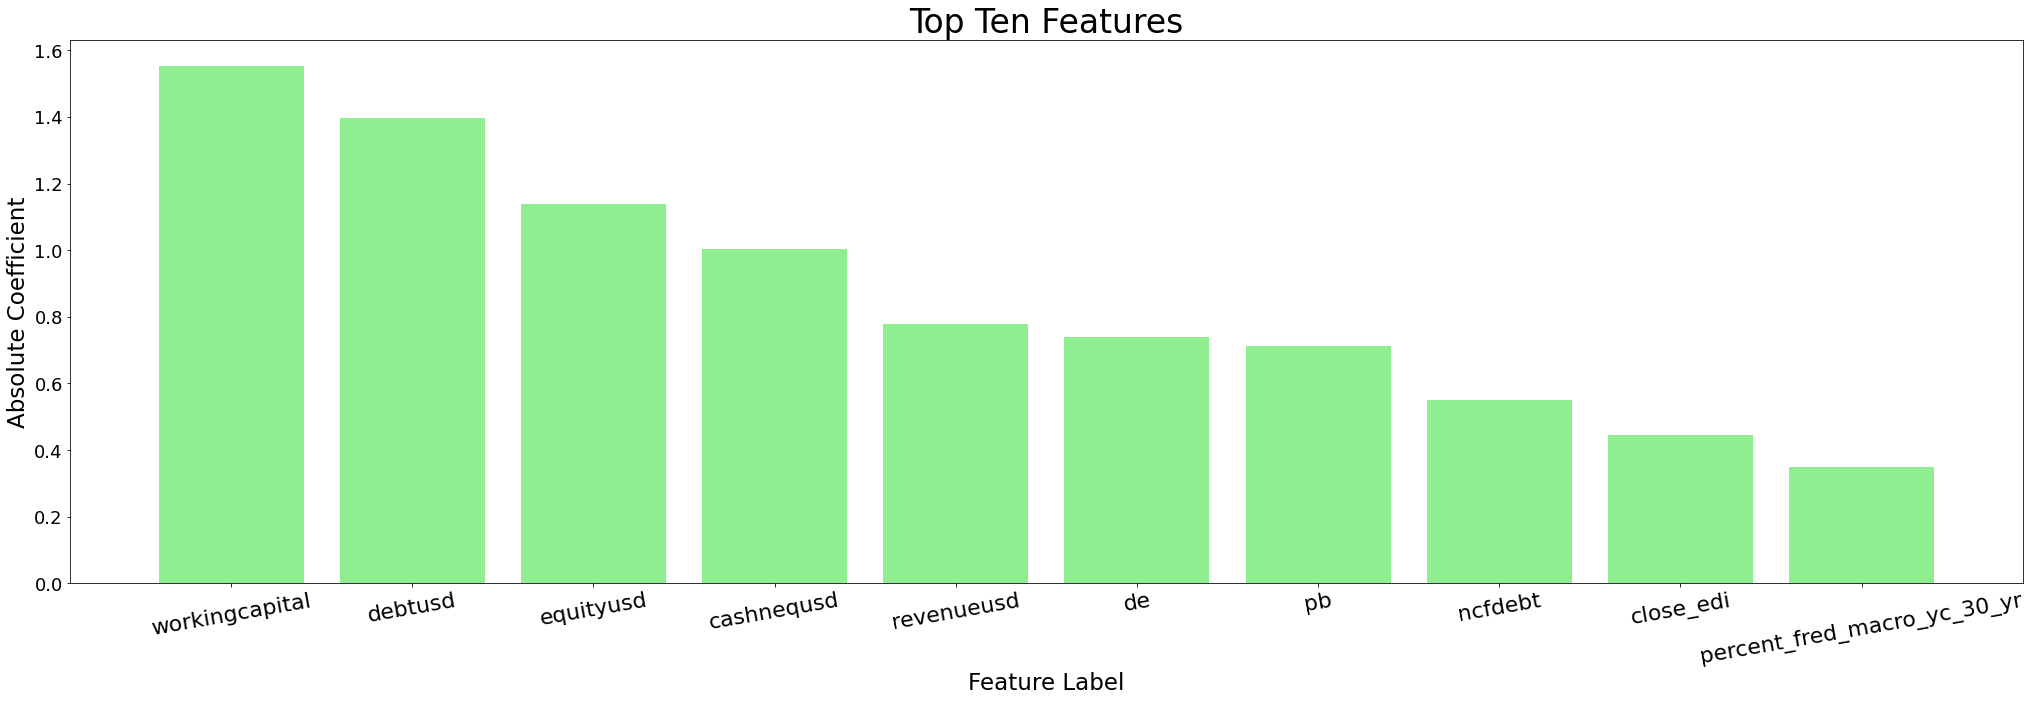

In [ ]:
# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

plt.figure(figsize=(35,10))
plt.title('Top Ten Features', fontsize=33)
plt.xlabel('Feature Label', fontsize=23)
plt.ylabel('Absolute Coefficient', fontsize=23)

pyplot.bar([x for x in range(10)], df['importance'].head(10), color='lightgreen')
plt.xticks([x for x in range(10)],df['feature'][:10],rotation=10, )

pyplot.xticks(fontsize=22)
pyplot.yticks(fontsize=18)

pyplot.show()